<a href="https://colab.research.google.com/github/zhiqian-chen/Traffic-Light-Classifier/blob/master/tl_classifier_imagai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

Do this if you want to use your Google Drive for storage or all files will be saved under /content

In [0]:
# Mount Google Drive.
from google.colab import drive
drive.mount('/content/drive')

# Check drive mounted or not
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Traffic-Light-Classifier')
os.listdir('./')

# Install Package

In [0]:
!pip3 install tensorflow-gpu==1.13.1
!pip3 install imageai

## Download Dataset

Beaware the size is about 3GB, which needs large storage space and long time for downloading

In [0]:
%%bash
wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1g-DN6RaZZ9L70i7Y_Bqqemj6mrXCjJ2m' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1g-DN6RaZZ9L70i7Y_Bqqemj6mrXCjJ2m" -O dataset.tar.gz && rm -rf /tmp/cookies.txt
tar -xzvf dataset.tar.gz

In [0]:
# Check file number
import os
os.chdir('dataset')
print('Size of training data image:', len(os.listdir(path= 'train/images')), ', annotation:', len(os.listdir(path= 'train/images')))
print('Size of validation data image:', len(os.listdir(path= 'validation/images')), ', annotation:', len(os.listdir(path= 'validation/images')))

# Training

In [0]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory= './')
trainer.setTrainConfig(object_names_array=['Red', 'Yellow', 'Green'], batch_size=4, num_experiments=20, train_from_pretrained_model="pretrained-yolov3.h5")
trainer.trainModel()

# Evaluation

Add your test data under ./test for evaluation

In [0]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath('models/detection_model-ex-017--loss-0002.718.h5')
detector.setJsonPath( 'json/detection_config.json')
detector.loadModel()

test_data_path= 'test/'
list= os.listdir(path= test_data_path)

Red  :  99.63136911392212  :  [522, 384, 564, 487]


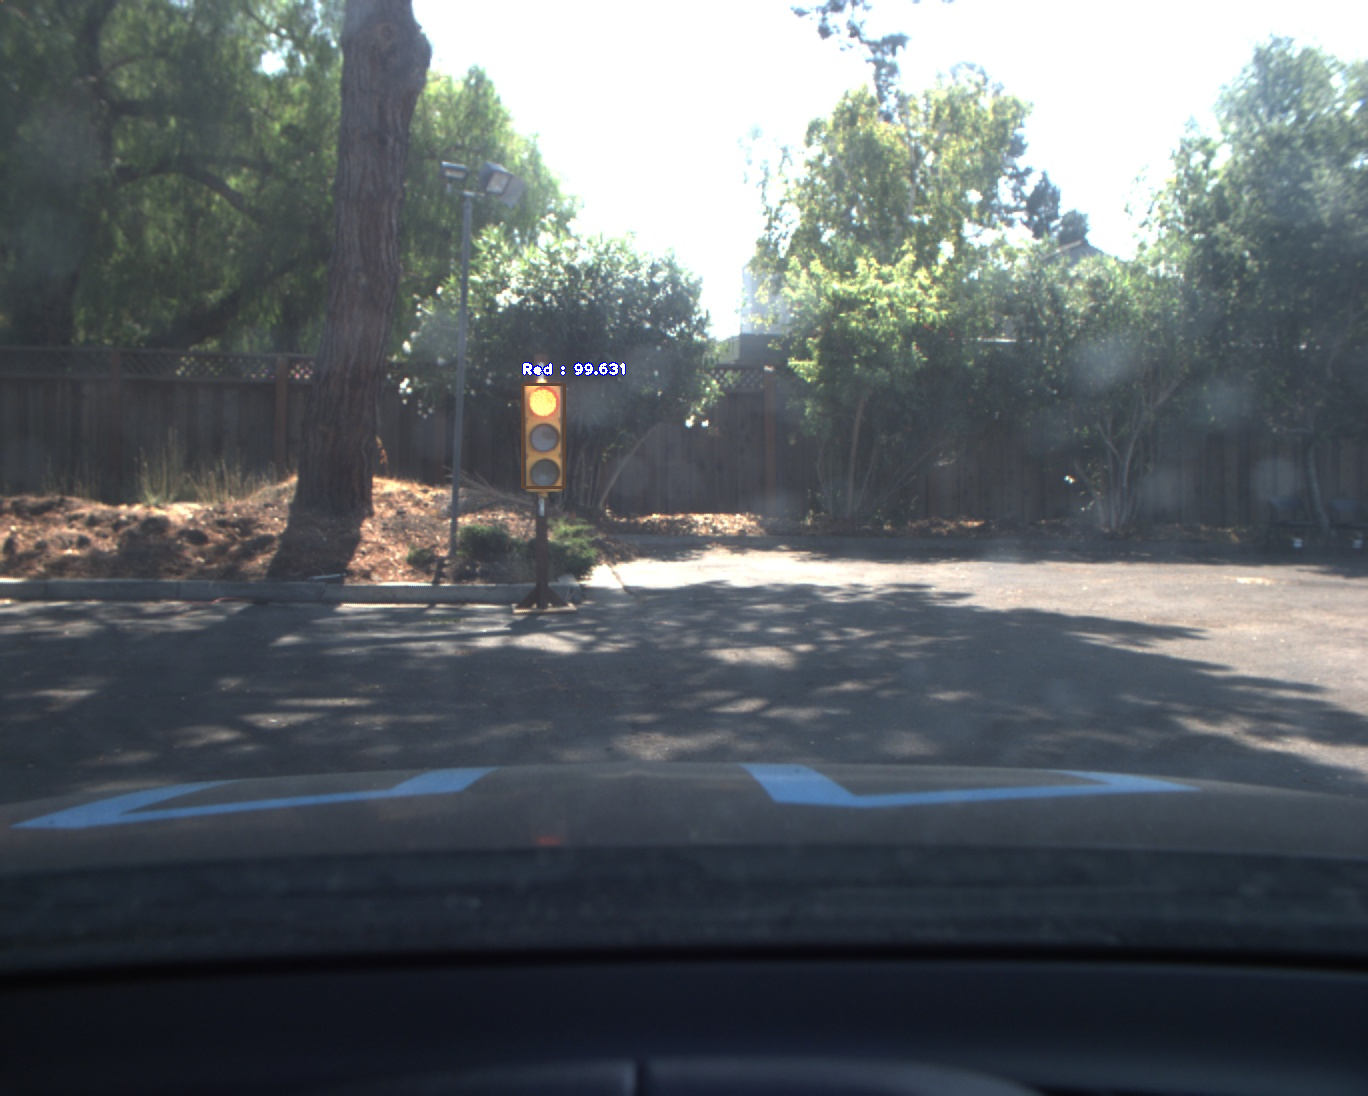

In [0]:
import random
from cv2 import imread
from google.colab.patches import cv2_imshow

image= imread(test_data_path+ random.choice(list))
drawn_image, detections = detector.detectObjectsFromImage(input_image= image, input_type= 'array', output_type= 'array')
for detection in detections:
    print(detection['name'], ' : ', detection['percentage_probability'], ' : ', detection['box_points'])

cv2_imshow(drawn_image)